# Import Data

In [637]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [638]:
import tensorflow as tf
import keras
from keras import layers
from sklearn.metrics import accuracy_score

In [639]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [640]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Mental Health Research/Chi-PCA-Rfe/'
data = pd.read_csv(file_path + 'rearranged_data_rfe_rf.csv')
data.columns

Index(['PCA 1', 'PCA 12', 'PCA 3', 'PCA 5', 'PCA 8', 'PCA 11', 'PCA 26',
       'PCA 17', 'PCA 25', 'PCA 27', 'PCA 2', 'PCA 21', 'PCA 14', 'PCA 13',
       'PCA 23', 'PCA 16', 'PCA 9', 'PCA 15', 'PCA 10', 'PCA 19', 'PCA 4',
       'PCA 6', 'PCA 18', 'PCA 20', 'PCA 22', 'PCA 7', 'PCA 24', 'Class'],
      dtype='object')

In [641]:
data.shape[1]

28

# Select No. of Features

In [642]:
feat_dnn = 14

# DNN

In [643]:
# Load the dataset
#data = pd.read_csv('rearranged_data_rfe_rf.csv')

X = data.iloc[:, :feat_dnn].values # Features
y = data.iloc[:, -1].values # Labels


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=143017)

In [644]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [645]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler().fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)'

In [646]:
# Build the DNN model
model = keras.Sequential(
    [
        layers.Dense(35, activation='tanh', input_dim=X_train.shape[1]),
        layers.Dense(15, activation='tanh'),
        layers.Dense(5, activation='softmax') # classification
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [647]:
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                     │ (None, 35)                  │             525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 15)                  │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 5)                   │              80 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,145 (4.47 KB)

 Trainable params: 1,145 (4.47 KB)

 Non-trainable params: 0 (0.00 B)

In [648]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [649]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                                              monitor='val_accuracy', mode='max',
                                              verbose=1)

In [650]:
X_train = np.array(X_train)
y_train = np.array(y_train)
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 10,
                    epochs = 100,
                    callbacks=[callback])

Epoch 1/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2000 - loss: 1.7761
Epoch 1: saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1912 - loss: 1.6997 - val_accuracy: 0.2941 - val_loss: 1.5863
Epoch 2/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4000 - loss: 1.4070
Epoch 2: saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3249 - loss: 1.4950 - val_accuracy: 0.3529 - val_loss: 1.4597
Epoch 3/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6000 - loss: 1.2643
Epoch 3: saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3684 - loss: 1.3431 - val_accuracy: 0.4314 - val_loss: 1.3812
Epoch 4/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3000 - loss: 1.1534
Epoch 4: saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3993 - loss: 1.2714 - val_accuracy: 0.3922 - val_loss: 1.3252
Epoch 5/100
 1/20 ━━━━━━━━━━

Accuracy

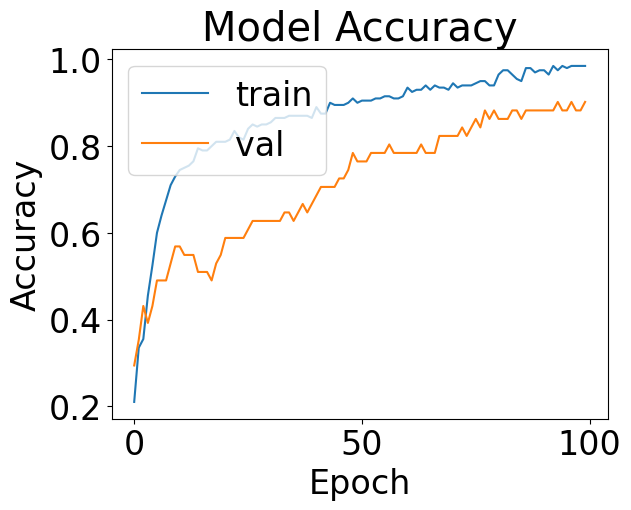

In [651]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss

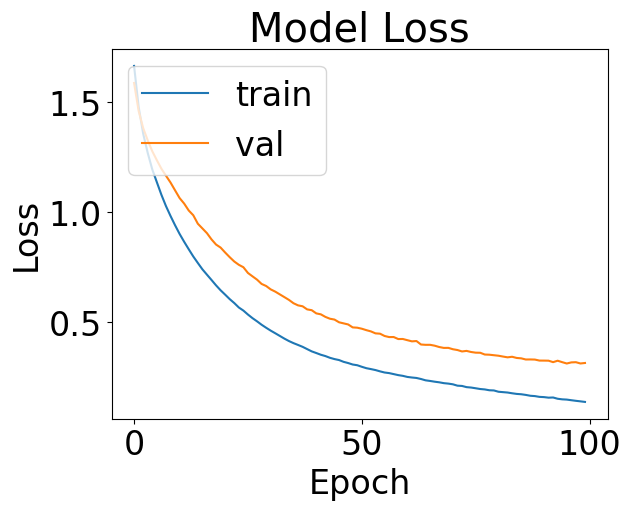

In [652]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Combined Accurac & Loss

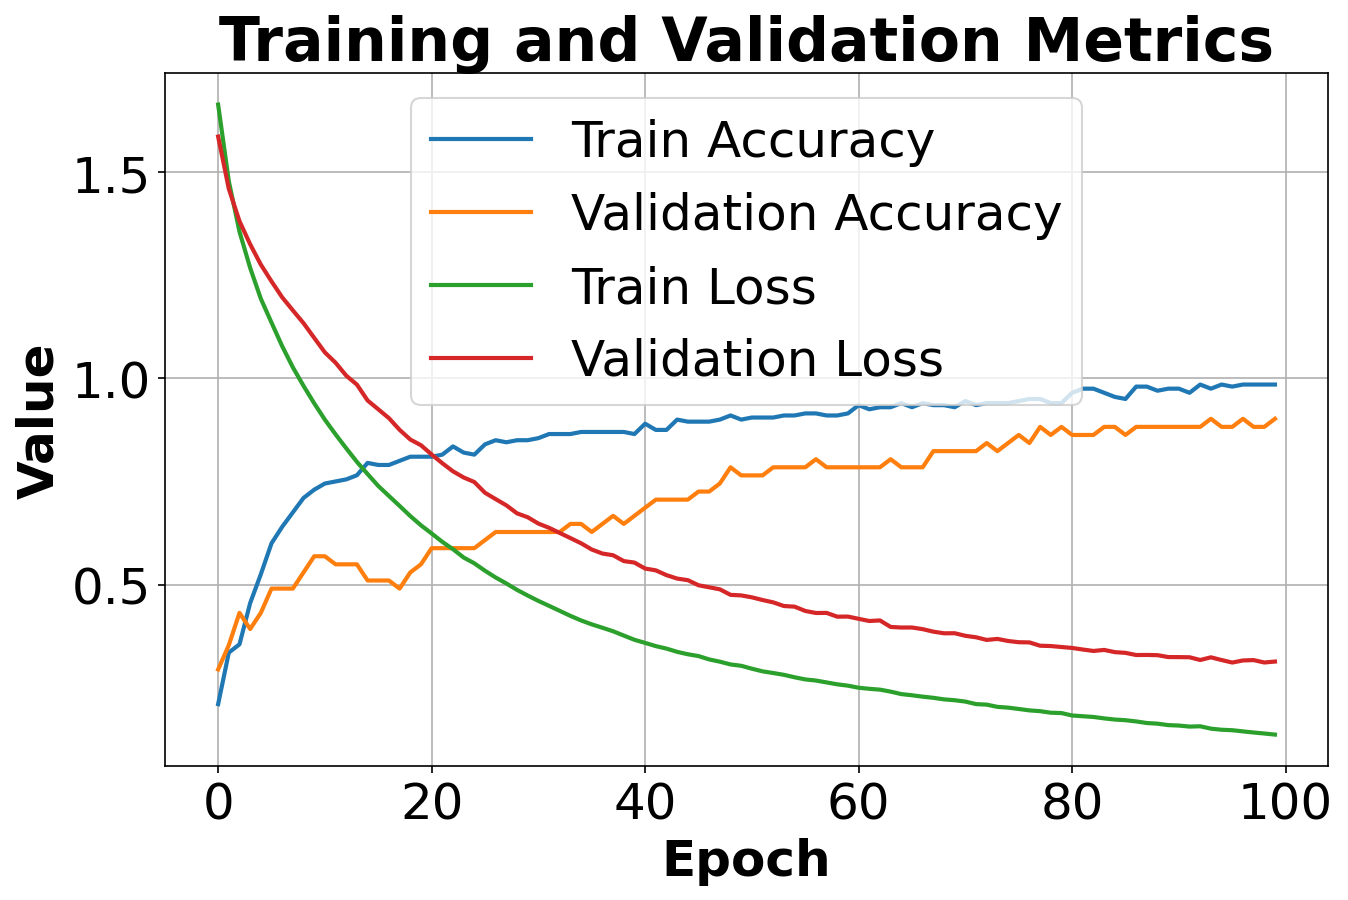

In [653]:
# Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(10, 6), dpi=150)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)

# Plot loss
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)

plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.title('Training and Validation Metrics', fontweight='bold')
plt.legend()
plt.grid(True)

# Save the figure
#plt.savefig('accuracy_loss_curve.png', dpi=300)
plt.show()

In [654]:
# Make predictions for multiclass classification
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Returns the index of the highest probability for each sample

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [655]:
y_test

array([1, 3, 3, 2, 4, 1, 2, 1, 2, 3, 3, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 1,
       2, 2, 4, 2, 3, 3, 3, 1, 0, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 0, 1, 1,
       2, 4, 2, 3, 2, 3, 1, 3, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 0])

In [656]:
y_pred_classes

array([1, 3, 3, 2, 3, 1, 2, 1, 2, 3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 3, 2, 1,
       2, 2, 3, 2, 3, 3, 3, 1, 0, 1, 2, 1, 3, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 3, 2, 3, 2, 4, 1, 3, 2, 1, 2, 2, 3, 3, 2, 3, 2, 2, 0])

In [657]:
# Printing confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion matrix:\n", cm)
n_classes = cm.shape[0]
class_accuracy = []
for i in range(n_classes):
    class_accuracy.append(cm[i,i]/np.sum(cm[i,:]))
print("Accuracy of each class: ", class_accuracy)

Confusion matrix:
 [[ 3  0  0  0  0]
 [ 2 13  0  0  0]
 [ 0  1 22  1  0]
 [ 0  0  0 15  1]
 [ 0  0  0  5  0]]
Accuracy of each class:  [1.0, 0.8666666666666667, 0.9166666666666666, 0.9375, 0.0]


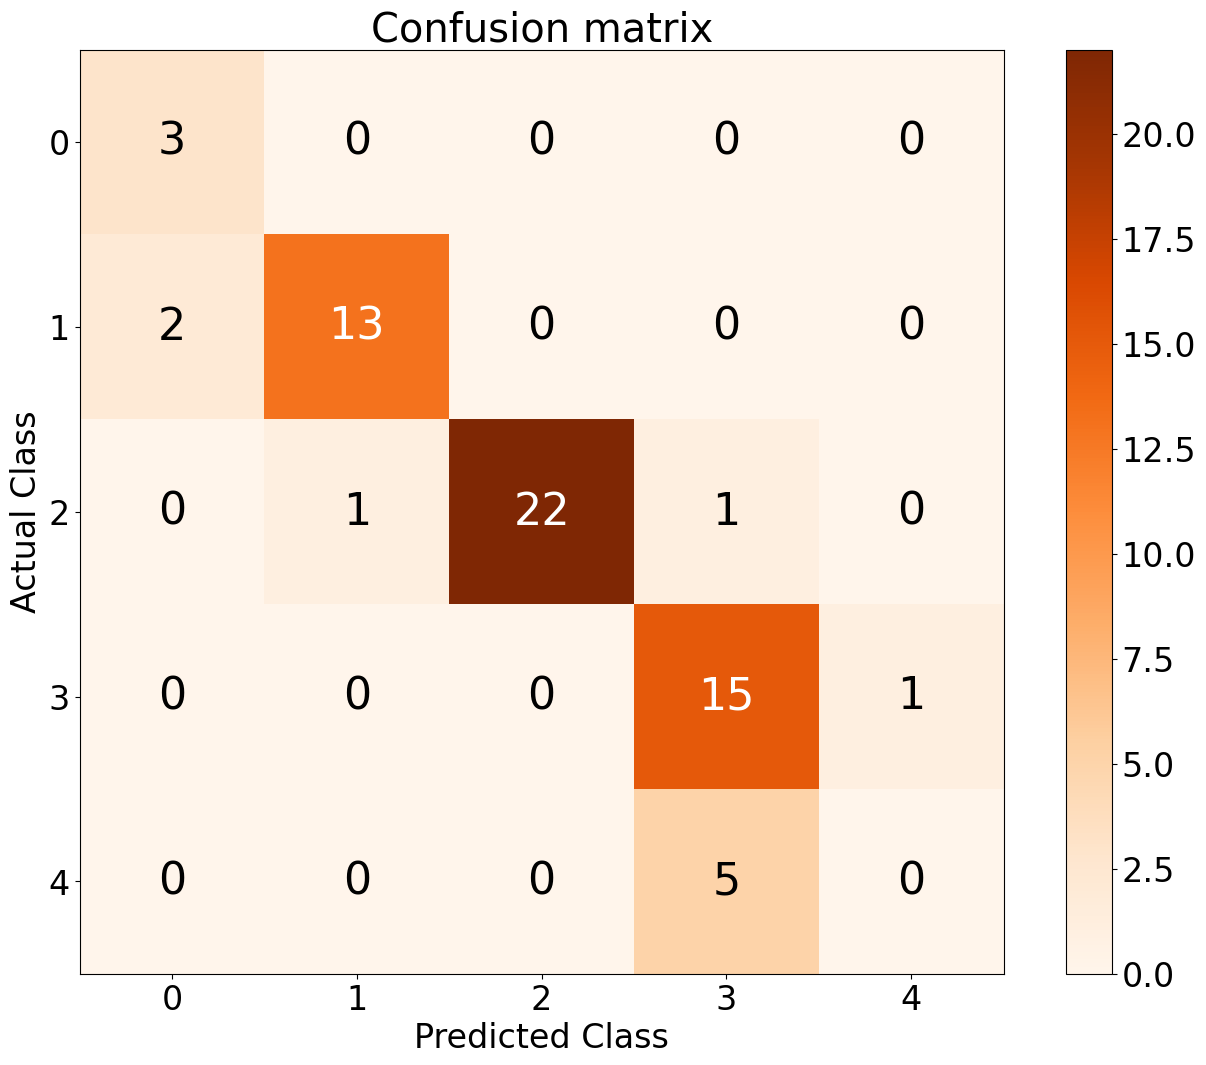

In [658]:
# Plotting confusion matrix
plt.figure(figsize=(16, 12))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, sorted(set(y)))
plt.yticks(tick_marks, sorted(set(y)))
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.annotate(str(cm[i][j]), xy=(j, i),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='white' if cm[i][j] > (0.5*cm.max()) else 'black',
                     fontsize=32)
plt.rcParams.update({'font.size': 24})
plt.savefig('cm-svm.png')
plt.show()

In [659]:
# Printing classification report
print("Classification report:\n", classification_report(y_test, y_pred_classes))

Classification report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.93      0.87      0.90        15
           2       1.00      0.92      0.96        24
           3       0.71      0.94      0.81        16
           4       0.00      0.00      0.00         5

    accuracy                           0.84        63
   macro avg       0.65      0.74      0.68        63
weighted avg       0.81      0.84      0.82        63



In [660]:
# Calculating metrics
accuracy_svm = metrics.accuracy_score(y_test, y_pred_classes)
precision_svm = metrics.precision_score(y_test, y_pred_classes, average=None)
recall_svm = metrics.recall_score(y_test, y_pred_classes, average=None)
f1_score_svm = metrics.f1_score(y_test, y_pred_classes, average=None)

In [661]:
# Printing metrics rounded to two decimal points
print("Accuracy:", round(accuracy_svm, 4))
print("Precision:", [round(p, 4) for p in precision_svm], round(sum(precision_svm) / len(precision_svm), 4))
print("Recall:", [round(r, 4) for r in recall_svm], round(sum(recall_svm) / len(recall_svm), 4))
print("F1-Score:", [round(f, 4) for f in f1_score_svm], round(sum(f1_score_svm) / len(f1_score_svm), 4))

Accuracy: 0.8413
Precision: [0.6, 0.9286, 1.0, 0.7143, 0.0] 0.6486
Recall: [1.0, 0.8667, 0.9167, 0.9375, 0.0] 0.7442
F1-Score: [0.75, 0.8966, 0.9565, 0.8108, 0.0] 0.6828
